<a href="https://colab.research.google.com/github/wahyunh10/Demand-Forecasting-Public-Bike-Rental-Project/blob/main/Random_Forest_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ensemble Model: Random Forest**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("cleandata.csv", index_col='datetime', parse_dates=True)
df.head()

,month,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,rentals
datetime,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,1,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,2,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,3,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,4,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
dfc = df.copy()
dfc.head()

,month,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,rentals
datetime,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,1,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,2,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,3,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,4,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
dfc

,month,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,rentals
datetime,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,12,19,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
2012-12-19 20:00:00,12,20,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
2012-12-19 21:00:00,12,21,4,0,1,1,13.94,15.910,61,15.0013,4,164,168


In [6]:
dummy_season = pd.get_dummies(dfc.season, prefix='season')
dummy_season.sample(n=10,random_state = 12)

,season_1,season_2,season_3,season_4
datetime,,,,
2012-01-10 12:00:00,1,0,0,0
2011-03-03 16:00:00,1,0,0,0
2011-11-05 16:00:00,0,0,0,1
2012-12-08 17:00:00,0,0,0,1
2011-06-10 17:00:00,0,1,0,0
2011-08-13 09:00:00,0,0,1,0
2012-01-01 12:00:00,1,0,0,0
2012-08-04 05:00:00,0,0,1,0
2011-12-17 16:00:00,0,0,0,1


In [7]:
dummy_weather = pd.get_dummies(dfc.weather, prefix='weather')
dummy_weather.sample(n=10, random_state = 12)

,weather_1,weather_2,weather_3,weather_4
datetime,,,,
2012-01-10 12:00:00,1,0,0,0
2011-03-03 16:00:00,1,0,0,0
2011-11-05 16:00:00,1,0,0,0
2012-12-08 17:00:00,1,0,0,0
2011-06-10 17:00:00,1,0,0,0
2011-08-13 09:00:00,0,1,0,0
2012-01-01 12:00:00,1,0,0,0
2012-08-04 05:00:00,1,0,0,0
2011-12-17 16:00:00,1,0,0,0


In [8]:
dummy_hour = pd.get_dummies(dfc.hour, prefix='hour')
dummy_hour.sample(n=10, random_state = 12)

,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
datetime,,,,,,,,,,,,,,,,,,,,,
2012-01-10 12:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-03-03 16:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2011-11-05 16:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2012-12-08 17:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2011-06-10 17:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2011-08-13 09:00:00,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2012-01-01 12:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-08-04 05:00:00,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-12-17 16:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [9]:
dfc = pd.concat([dfc, dummy_hour], axis=1)
dfc = pd.concat([dfc, dummy_weather], axis=1)
dfc = pd.concat([dfc, dummy_season], axis=1)

In [10]:
dfc.head(10)

,month,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,...,hour_22,hour_23,weather_1,weather_2,weather_3,weather_4,season_1,season_2,season_3,season_4
datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,1,0,0,1,9.84,14.395,81,0.0000,...,0,0,1,0,0,0,1,0,0,0
2011-01-01 01:00:00,1,1,1,0,0,1,9.02,13.635,80,0.0000,...,0,0,1,0,0,0,1,0,0,0
2011-01-01 02:00:00,1,2,1,0,0,1,9.02,13.635,80,0.0000,...,0,0,1,0,0,0,1,0,0,0
2011-01-01 03:00:00,1,3,1,0,0,1,9.84,14.395,75,0.0000,...,0,0,1,0,0,0,1,0,0,0
2011-01-01 04:00:00,1,4,1,0,0,1,9.84,14.395,75,0.0000,...,0,0,1,0,0,0,1,0,0,0
2011-01-01 05:00:00,1,5,1,0,0,2,9.84,12.880,75,6.0032,...,0,0,0,1,0,0,1,0,0,0
2011-01-01 06:00:00,1,6,1,0,0,1,9.02,13.635,80,0.0000,...,0,0,1,0,0,0,1,0,0,0
2011-01-01 07:00:00,1,7,1,0,0,1,8.20,12.880,86,0.0000,...,0,0,1,0,0,0,1,0,0,0
2011-01-01 08:00:00,1,8,1,0,0,1,9.84,14.395,75,0.0000,...,0,0,1,0,0,0,1,0,0,0


In [11]:
dfc.drop(['hour','season','weather','atemp','casual','registered'], axis = 1, inplace=True)
dfc.head(20)

,month,holiday,workingday,temp,humidity,windspeed,rentals,hour_0,hour_1,hour_2,...,hour_22,hour_23,weather_1,weather_2,weather_3,weather_4,season_1,season_2,season_3,season_4
datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,9.84,81,0.0000,16,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2011-01-01 01:00:00,1,0,0,9.02,80,0.0000,40,0,1,0,...,0,0,1,0,0,0,1,0,0,0
2011-01-01 02:00:00,1,0,0,9.02,80,0.0000,32,0,0,1,...,0,0,1,0,0,0,1,0,0,0
2011-01-01 03:00:00,1,0,0,9.84,75,0.0000,13,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2011-01-01 04:00:00,1,0,0,9.84,75,0.0000,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2011-01-01 05:00:00,1,0,0,9.84,75,6.0032,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2011-01-01 06:00:00,1,0,0,9.02,80,0.0000,2,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2011-01-01 07:00:00,1,0,0,8.20,86,0.0000,3,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2011-01-01 08:00:00,1,0,0,9.84,75,0.0000,8,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [12]:
dfc.columns

Index(['month', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'rentals', 'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5',
       'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'weather_1',
       'weather_2', 'weather_3', 'weather_4', 'season_1', 'season_2',
       'season_3', 'season_4'],
      dtype='object')

In [14]:
X = dfc[['temp','hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6',
       'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23','weather_1',
       'weather_2', 'weather_3', 'weather_4', 'season_1', 'season_2',
       'season_3', 'season_4']]

In [15]:
X.columns

Index(['temp', 'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5',
       'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'weather_1',
       'weather_2', 'weather_3', 'weather_4', 'season_1', 'season_2',
       'season_3', 'season_4'],
      dtype='object')

# **Scaling the Features using STD SCALER**

In [16]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X) # Standardization Technique

In [17]:
y = dfc[['rentals']]

In [18]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.25, random_state=100)

# **Random Forest**

**Based Model**

In [20]:
from sklearn.ensemble import RandomForestRegressor
regressorrf = RandomForestRegressor(n_estimators=10, random_state = 0) # The Hyperparameters are set to default.
regressorrf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(n_estimators=10, random_state=0)

In [21]:
y_pred = regressorrf.predict(X_test)
y_pred

array([ 43.26166667, 410.74666667,  11.33333333, ...,  70.31      ,
       517.35      ,  64.7       ])

**Performance Evaluation**

In [22]:
metrics.mean_absolute_error(y_test,y_pred)

67.02921113097642

In [23]:
metrics.mean_squared_error(y_test,y_pred)

9951.150309881104

In [24]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

99.7554525320852

# **Hyperparameter Tuning the Random Forest in Python**

**Random Search Cross Validation in Scikit-Learn**

we only have a vague idea of the best hyperparameters and thus the best approach to narrow our search is to evaluate a wide range of values for each hyperparameter.

Using Scikit-Learn’s RandomizedSearchCV method, we can define a grid of hyperparameter ranges, and randomly sample from the grid, performing K-Fold CV with each combination of values.

* n_estimators = number of trees in the foreset
* max_features = max number of features considered for splitting a node
* max_depth = max number of levels in each decision tree
* min_samples_split = min number of data points placed in a node before the node is split
* min_samples_leaf = min number of data points allowed in a leaf node
* bootstrap = method for sampling data points (with or without replacement)

In [25]:
from pprint import pprint

In [26]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200]}


In [27]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()


# Random search of parameters, using 5 fold cross validation, 
# search across 50 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 5, verbose=2, random_state=42, n_jobs = -1)


# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 31, 52, 73, 94,
                                                         115, 136, 157, 178,
                                                         200]},
                   random_state=42, verbose=2)

# **The optimal Hyperparameters are:**

In [28]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 90,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 73}

# **RF Model using the optimal parameters**

In [29]:
cvrf = RandomForestRegressor(n_estimators=73, min_samples_split=10, min_samples_leaf=4, max_features= 'sqrt', max_depth=50 ,random_state = 0)
cvrf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(max_depth=50, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=73, random_state=0)

In [30]:
cvy_pred = cvrf.predict(X_test)
cvy_pred

array([ 70.63565756, 374.44406592,   9.99641108, ...,  56.9761191 ,
       465.33667283,  68.57853167])

# **Performance Evaluation**

In [31]:
metrics.mean_absolute_error(y_test,cvy_pred)

62.06890008104993

In [32]:
metrics.mean_squared_error(y_test,cvy_pred)

7966.476061607178

In [33]:
np.sqrt(metrics.mean_squared_error(y_test,cvy_pred))

89.25511784546127

In [34]:
new_df=y_test.copy()
new_df['pred']=cvy_pred
new_df=new_df.sort_index()
new_df

,rentals,pred
datetime,,
2011-01-01 01:00:00,40,10.034436
2011-01-01 03:00:00,13,13.615278
2011-01-01 12:00:00,84,193.205542
2011-01-01 21:00:00,34,106.224411
2011-01-01 22:00:00,28,96.157307
...,...,...
2012-12-19 04:00:00,7,8.129759
2012-12-19 10:00:00,164,177.823274
2012-12-19 17:00:00,562,425.067185


Text(0, 0.5, 'Value of Bike Rental')

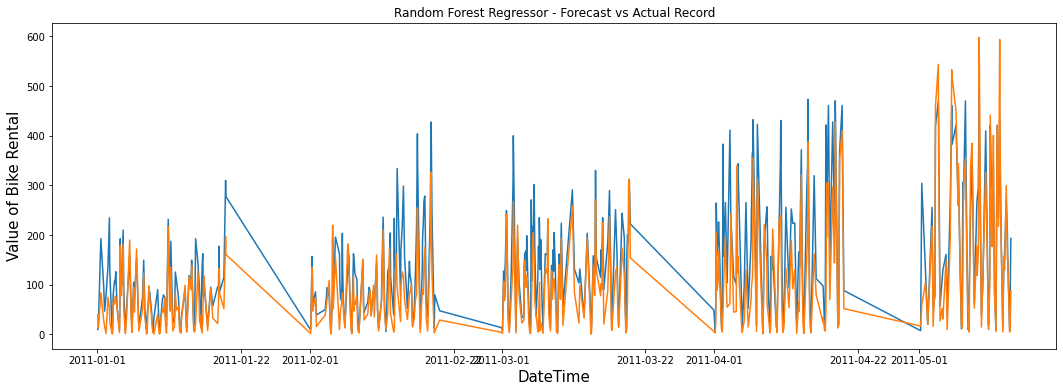

In [35]:
plt.figure(figsize=(18, 6))
plt.plot(new_df['pred'][0:500])
plt.plot(new_df['rentals'][0:500])
plt.title('Random Forest Regressor - Forecast vs Actual Record')
plt.xlabel('DateTime',fontsize=15)
plt.ylabel('Value of Bike Rental',fontsize=15)